## Overview

The goal of this notebook is to build, evaluate and compare a neural network model using different parameters. This neural network will be designed for classifying handwritten digits from the MNIST dataset. The MNIST dataset consists of 28x28 pixel grayscale images of handwritten digits (0 through 9).

### Preprocessing Data

Before training, the images are reshaped from their original 2D format (28x28 pixels) to a 1D vector of 784 pixels. This transformation is necessary because the input layer of our neural network model expects a 1D array of features for each sample.

### Model Architecture

The neural network model is structured as follows:

1. **Input Layer**: Accepts a flattened input of 784 features (pixels).
2. **Hidden Layers**: Consists of two dense layers with ReLU activation. The first layer has 128 neurons, and the second has 64 neurons.
3. **Output Layer**: A dense layer with 10 neurons (one for each digit) using the softmax activation function to output the probability distribution over the 10 classes.

### Compilation

The model is compiled with the Adam optimizer and a variety of cost functions.

### Training

The model is trained for 10 epochs, and 20% of the training data is reserved for validation.

### Evaluating

Visual graphs are presented to present the differences between the parameters choices.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

2024-04-29 13:27:03.056200: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 13:27:03.059221: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 13:27:03.101060: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 13:27:03.980000: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"There are {len(train_images)} train images and labels, with {len(test_images)} test images and labels")
print("Each image is represented as a 28 * 28 numpy array of values range [0-255] (grayscale pixels)")

There are 60000 train images and labels, with 10000 test images and labels
Each image is represented as a 28 * 28 numpy array of values range [0-255] (grayscale pixels)


### Raw image example:

In [3]:
# Image Example
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Image example visualization 

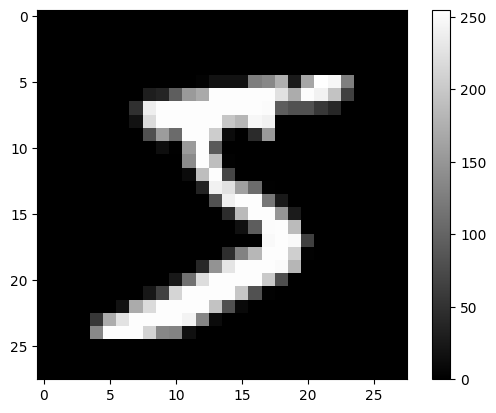

In [4]:
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.show()


In [5]:
# Reshape the images
train_images: np.ndarray = train_images.reshape((-1, 28 * 28))
test_images: np.ndarray = test_images.reshape((-1, 28 * 28))

In [6]:
# Define the parameter grid
neuron_choices = [1, 2, 4, 8, 16, 32, 64, 128, 256]  # Different options for the number of neurons
activation_choices = ['relu', 'tanh', 'sigmoid']  # Different activation functions

In [7]:
results: dict[str, dict[str, float]] = {}

for neurons in neuron_choices:
    for activation in activation_choices:
            model = tf.keras.models.Sequential([
                tf.keras.layers.Input(shape=(784,)),
                tf.keras.layers.Dense(neurons, activation=activation),
                tf.keras.layers.Dense(neurons, activation=activation),
                tf.keras.layers.Dense(10, activation='softmax')
            ])

            model.compile(
                optimizer="adam",
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )

            print(f"Training model with {neurons} neurons, activation {activation}")

            start_time = time.time()

            history = model.fit(
                train_images, train_labels, 
                epochs=10, 
                validation_split=0.2,
                verbose=0
            )

            end_time = time.time()

            key = f"{neurons}_{activation}"

            _, test_acc = model.evaluate(test_images, test_labels)

            print(f"Test accuracy: {test_acc}")
            results[key] = {
                'Training Accuracy': history.history['accuracy'][-1],
                'Validation Accuracy': history.history['val_accuracy'][-1],
                'Testing Accuracy': test_acc,
                'Elapsed Time': end_time - start_time
            }

Training model with 1 neurons, activation relu
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.1160 - loss: 2.3011
Test accuracy: 0.11349999904632568
Training model with 1 neurons, activation tanh
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.2042 - loss: 2.0047
Test accuracy: 0.20579999685287476
Training model with 1 neurons, activation sigmoid
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.2084 - loss: 1.9156
Test accuracy: 0.20800000429153442
Training model with 2 neurons, activation relu
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.3529 - loss: 1.7326
Test accuracy: 0.36320000886917114
Training model with 2 neurons, activation tanh
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.3777 - loss: 1.5321
Test accuracy: 0.38440001010894775
Training model with 2 neurons, activation sigmoid
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.3670 - loss: 1.5729
Test accuracy: 0.3720000088214874
Training model with 4 neurons, activation

In [8]:
labels = []
train_accs = []
val_accs = []
test_accs = []
elapsed_times = []

for config, metrics in results.items():
    labels.append(config)
    train_accs.append(metrics['Training Accuracy'])
    val_accs.append(metrics['Validation Accuracy'])
    test_accs.append(metrics['Testing Accuracy'])
    elapsed_times.append(metrics['Elapsed Time'])

## Results Visualization

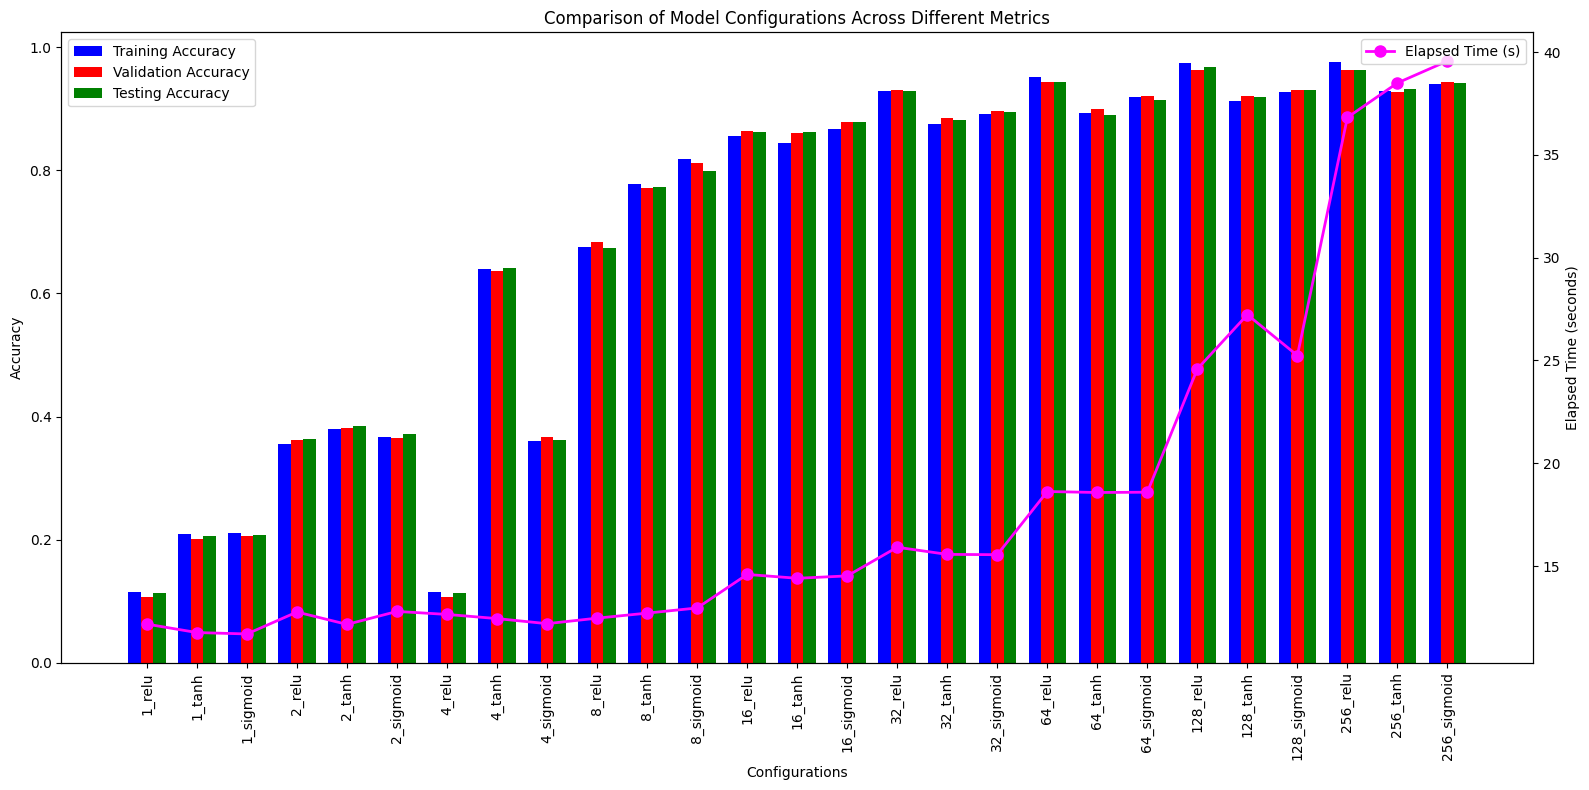

In [9]:
# Set up the figure size
plt.figure(figsize=(16, 8))

# Create an index for each tick position
x = range(len(labels))

# Calculate bar positions
train_positions = [i - 0.25 for i in x]
val_positions = [i for i in x]
test_positions = [i + 0.25 for i in x]

# Create bar plots for accuracy
plt.bar(train_positions, train_accs, width=0.25, label='Training Accuracy', color='b', align='center')
plt.bar(val_positions, val_accs, width=0.25, label='Validation Accuracy', color='r', align='center')
plt.bar(test_positions, test_accs, width=0.25, label='Testing Accuracy', color='g', align='center')

# Adding labels and title
plt.xlabel('Configurations')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Configurations Across Different Metrics')

# Set the position of the x ticks
plt.xticks(x, labels, rotation='vertical')

# Adding primary y-axis legend
plt.legend(loc='upper left')

# Create a second y-axis for elapsed time
ax2 = plt.gca().twinx()
ax2.plot(labels, elapsed_times, label='Elapsed Time (s)', color='magenta', marker='o', linewidth=2, markersize=8)
ax2.set_ylabel('Elapsed Time (seconds)')

# Adding secondary y-axis legend
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


## Observations And Conclusions

### Accuracy Vs. Elapsed Time 

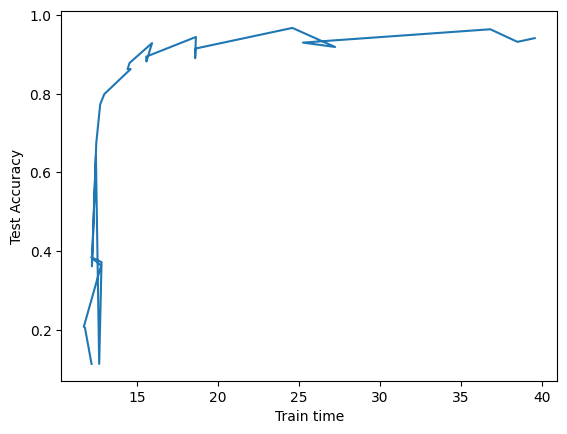

In [11]:
plt.plot(elapsed_times, test_accs)
plt.xlabel('Train time')
plt.ylabel('Test Accuracy')
plt.show()

### Accuracy Vs. Number of Neurons

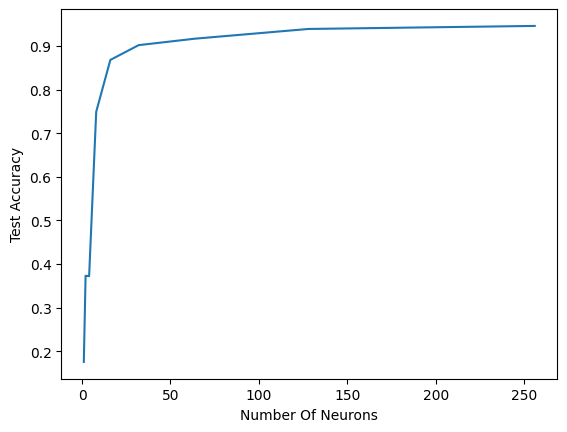

In [22]:
accuracies_by_number_of_neurons: list[float] = []
number_of_activation_choices = len(activation_choices)

for k in range(0, len(test_accs), number_of_activation_choices):
    avg = sum(test_accs[k:k+number_of_activation_choices]) / number_of_activation_choices
    accuracies_by_number_of_neurons.append(avg)

plt.plot(neuron_choices, accuracies_by_number_of_neurons)
plt.xlabel('Number Of Neurons')
plt.ylabel('Test Accuracy')
plt.show()

### Accuracy Vs. Activation Functions

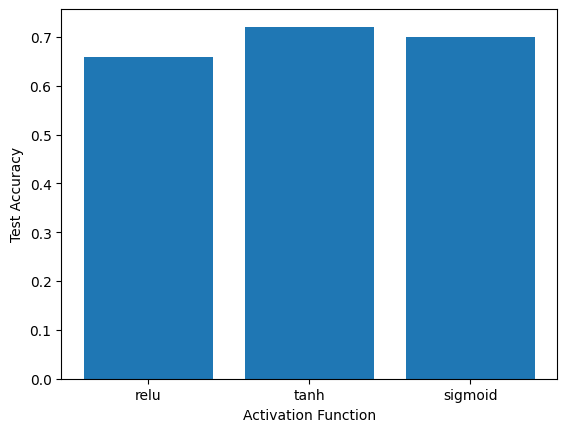

In [33]:
accuracies_by_activation_function: list[float] = []

for func in activation_choices:
    accuracies = [acc["Testing Accuracy"] for config, acc in results.items() if func in config]
    average = sum(accuracies) / len(accuracies)
    accuracies_by_activation_function.append(average)

plt.bar(activation_choices, accuracies_by_activation_function, label='Testing Accuracy')
plt.xlabel('Activation Function')
plt.ylabel('Test Accuracy')
plt.show()